 The Goal here is to make distributions and add features based on distributions and categories. <br>
 We removed the outliers and made new features.  <br><br>
 The result of this process in some steps that at the end stored in dataframes and CSVs: <br>
 1- final_episodes (All - diag/med related features) <br>
 2- final_episodes4 (All + diag/med related features)<br>

In [90]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from kneed import DataGenerator, KneeLocator 
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import warnings

In [91]:
#load the data
episodes = pd.read_csv('/home/kabank/workbench/.conda/analysis/Resources/epiosdes2.csv') # before merge
full_episodes = pd.read_csv('/home/kabank/workbench/.conda/analysis/Resources/full_episodes.csv') # after merge

In [92]:
episodes[episodes['pasient']==19805]

,pasient,episode_id,patient_age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient,count_lmssciadm,count_inpatient_day,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others
2292,19805,2894,13,285,0.829156,M,1,0,9,5,...,1,0,0,1,1,5,0,0,0,0
12131,19805,15284,13,282,0.471405,M,2,0,9,5,...,1,0,0,1,0,2,0,0,0,0
19989,19805,25296,24,156,0.000000,M,3,1,2,1,...,2,0,0,2,1,1,0,0,0,0


In [93]:
full_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22857 entries, 0 to 22856
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                22857 non-null  int64  
 1   pasient                   22857 non-null  int64  
 2   episode_id                22857 non-null  int64  
 3   age                       22857 non-null  int64  
 4   remaining_time_countdown  22857 non-null  int64  
 5   var_no_dates_permonth     22857 non-null  float64
 6   gender                    22857 non-null  object 
 7   episode_order             22857 non-null  int64  
 8   islast                    22857 non-null  int64  
 9   closingcode               22857 non-null  int64  
 10  aftercode                 22857 non-null  int64  
 11  instanskode               22857 non-null  int64  
 12  episode_start_date        22857 non-null  object 
 13  episode_end_date          22857 non-null  object 
 14  count_

In [94]:
full_episodes.columns

Index(['Unnamed: 0', 'pasient', 'episode_id', 'age',
       'remaining_time_countdown', 'var_no_dates_permonth', 'gender',
       'episode_order', 'islast', 'closingcode', 'aftercode', 'instanskode',
       'episode_start_date', 'episode_end_date', 'count_poliklinikk',
       'count_familieavdeling', 'count_dagavdeling', 'count_dognavdeling',
       'count_osv', 'count_outpatient', 'count_inpatient', 'count_lmssciadm',
       'count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging',
       'count_ikkemott', 'count_others', 'tillnextepisode',
       'starttillnextstart', 'Length_of_Episode'],
      dtype='object')

In [95]:
full_episodes. drop(columns=['Unnamed: 0'], inplace=True)
full_episodes[full_episodes["age"].isna() | (full_episodes["age"]<0)] 

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode


In [96]:
full_episodes[(full_episodes["age"] > 18)] #154 rows that should be removed

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode
19,22,4518,19,219,1.462494,F,1,1,2,2,...,0,8,0,0,0,0,0,NaN,NaN,182
340,370,3966,31,75,0.000000,F,1,1,1,5,...,0,3,1,0,1,0,1,NaN,NaN,2
440,481,568,20,120,0.666667,F,1,1,4,2,...,0,7,0,0,1,0,0,NaN,NaN,548
512,561,18494,50,69,1.577909,F,1,1,1,4,...,0,10,3,0,1,1,1,NaN,NaN,186
614,661,14138,26,111,0.000000,F,1,1,0,5,...,0,2,0,1,0,0,0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21086,22619,16905,19,42,0.745356,F,2,1,1,5,...,0,5,2,2,1,3,1,NaN,NaN,181
21752,7802,19806,44,12,1.006410,F,2,1,0,5,...,0,152,94,7,15,10,136,NaN,NaN,3382
21908,9807,11202,39,12,0.758500,F,2,1,1,4,...,0,18,2,1,1,2,1,NaN,NaN,922
22269,14757,11229,19,9,0.000000,M,3,1,4,1,...,0,1,1,0,1,0,0,NaN,NaN,2


In [97]:
paseint_list = full_episodes[(full_episodes["age"] > 18)& (full_episodes["episode_order"] > 1) ]['pasient']
full_episodes[full_episodes['pasient'].isin(paseint_list)]

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode
970,1050,28531,17,207,0.276385,F,1,0,5,1,...,0,1,1,0,0,0,0,2377.0,2739.0,363
971,1050,16531,25,123,0.471405,F,2,1,1,4,...,0,2,0,0,1,0,1,NaN,NaN,179
1024,1111,1618,8,114,0.697078,F,1,0,1,4,...,0,16,7,10,0,1,0,2011.0,4200.0,2190
1025,1111,25595,20,42,0.500000,F,2,1,1,5,...,0,7,1,1,1,1,1,NaN,NaN,181
1576,1707,1906,6,120,0.672051,M,1,0,1,1,...,0,26,11,0,7,1,1,1644.0,6028.0,4385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21908,9807,11202,39,12,0.758500,F,2,1,1,4,...,0,18,2,1,1,2,1,NaN,NaN,922
22268,14757,23347,4,21,1.178641,M,2,0,1,4,...,0,193,124,48,33,5,14,364.0,5482.0,5119
22269,14757,11229,19,9,0.000000,M,3,1,4,1,...,0,1,1,0,1,0,0,NaN,NaN,2
22640,19805,2894,13,282,0.650280,M,2,0,9,5,...,2,1,7,0,0,0,0,3837.0,4018.0,182


In [98]:
full_episodes.loc[(full_episodes['pasient'].isin(paseint_list)) & (full_episodes['age'] < 19), 'islast'] = 1
full_episodes.loc[(full_episodes['pasient'].isin(paseint_list)) & (full_episodes['age'] < 19), 'tillnextepisode'] = np.nan

In [99]:
full_episodes[(full_episodes['pasient'].isin(paseint_list)) & (full_episodes['age']<19)]

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode
970,1050,28531,17,207,0.276385,F,1,1,5,1,...,0,1,1,0,0,0,0,NaN,2739.0,363
1024,1111,1618,8,114,0.697078,F,1,1,1,4,...,0,16,7,10,0,1,0,NaN,4200.0,2190
1576,1707,1906,6,120,0.672051,M,1,1,1,1,...,0,26,11,0,7,1,1,NaN,6028.0,4385
3315,3616,10324,14,147,0.618110,M,1,1,1,5,...,6,1,1,1,6,0,1,NaN,2282.0,2195
3421,3728,16030,17,42,1.589353,M,1,1,1,1,...,0,42,13,3,3,2,2,NaN,823.0,729
6843,7403,21322,14,108,1.419726,M,1,1,1,5,...,0,99,38,28,8,4,1,NaN,2288.0,1918
7695,8330,28801,12,69,1.499953,F,1,1,1,1,...,116,167,59,74,31,29,42,NaN,2645.0,2555
8203,8871,24905,11,180,1.512725,M,1,1,1,4,...,0,42,12,0,5,1,0,NaN,4295.0,1005
8330,9008,23069,16,144,2.702180,F,1,1,2,1,...,219,131,44,47,25,0,6,NaN,3920.0,369
9136,9877,22302,12,273,1.310768,F,1,1,1,4,...,0,35,10,0,2,0,0,NaN,8945.0,821


In [100]:
# Removing the episodes with age null and negative
full_episodes = full_episodes[~(full_episodes["age"].isna() | (full_episodes["age"]<0))]

In [101]:
# Removing the episodes with age older than 18
full_episodes = full_episodes[~(full_episodes["age"] > 18)]

In [102]:
# check updating islast
full_episodes[full_episodes['pasient']==2390]

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode
2185,2390,3919,6,102,0.243885,F,1,0,1,4,...,0,1,3,2,3,0,2,1826.0,2282.0,457
2186,2390,4360,12,18,0.400000,F,2,1,1,4,...,0,6,1,0,1,1,0,NaN,NaN,738


In [103]:
outliers1 = full_episodes[full_episodes["Length_of_Episode"]>6570] 
outliers1["Length_of_Episode"].describe()

count       6.000000
mean     7153.666667
std       856.899683
min      6578.000000
25%      6689.250000
50%      6847.000000
75%      7079.750000
max      8856.000000
Name: Length_of_Episode, dtype: float64

In [104]:
ll =[]
ll = outliers1['episode_id'].unique()
print(*ll)
#1525 16916 1932 : >6570 (18*365)
# 25279 : >6934 (19*365 - 1)
# I do not want to remove any of them, they seem fine

1920 1525 16916 1932 9264 25279


In [105]:
outliers1['episode_id'].unique()

array([ 1920,  1525, 16916,  1932,  9264, 25279])

In [106]:
l = outliers1['pasient'].unique()
c = full_episodes[full_episodes['pasient'].isin(l)]
len(c)
c[['pasient', 'episode_id', 'age',
       'remaining_time_countdown', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'episode_start_date',
       'episode_end_date', 'count_poliklinikk', 'count_familieavdeling',
       'count_dagavdeling', 'count_dognavdeling', 'count_osv',
       'count_outpatient', 'count_inpatient', 'count_lmssciadm',
       'count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging', 'tillnextepisode', 'Length_of_Episode']]

,pasient,episode_id,age,remaining_time_countdown,gender,episode_order,islast,closingcode,aftercode,episode_start_date,...,count_inpatient,count_lmssciadm,count_inpatient_day,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,tillnextepisode,Length_of_Episode
1026,1112,1920,13,6,F,1,1,2,1,1997-12-30,...,0,0,0,0,3,4,1,2,NaN,7128
6920,7492,1525,17,69,M,1,1,2,2,1994-01-06,...,3,0,0,3,12,2,0,1,NaN,6666
10472,11336,16916,17,72,F,1,1,4,2,1994-01-03,...,11,0,0,11,12,2,0,10,NaN,6578
20402,21915,1932,15,42,M,1,1,1,4,1996-01-02,...,0,0,0,0,5,10,9,7,NaN,6759
21173,997,9264,8,9,M,2,1,1,4,1993-01-05,...,0,0,0,0,38,17,5,23,NaN,8856
21842,8875,25279,15,39,F,2,1,1,4,1995-10-05,...,8,0,3,5,29,12,3,1,NaN,6935


In [107]:
full_episodes.dropna(subset=['Length_of_Episode'], inplace=True)

In [108]:
len(full_episodes) 

22679

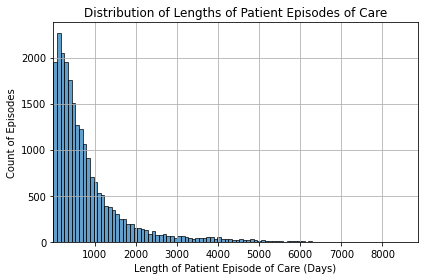

In [109]:
num_bins = 100
# Calculate the range of data on the x-axis
min_length = full_episodes['Length_of_Episode'].min()
max_length = full_episodes['Length_of_Episode'].max()


# Create the histogram
plt.hist(full_episodes['Length_of_Episode'], bins=num_bins, edgecolor="k", alpha=0.7)
# Set labels and title
plt.xlabel("Length of Patient Episode of Care (Days)")
plt.ylabel("Count of Episodes")
plt.title("Distribution of Lengths of Patient Episodes of Care")

# Set the x-axis limits based on the data range
plt.xlim(min_length, max_length)

# Display the grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.savefig("/home/kabank/CAMHS_Readmission_Analytics/Paper_figures/Distribution of Lengths of Patient Episodes of Care.jpg", dpi=300)
plt.show()

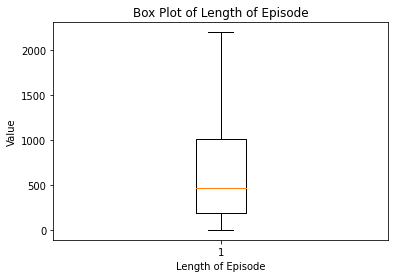

In [110]:
plt.boxplot(full_episodes['Length_of_Episode'], showfliers=False)
plt.xlabel('Length of Episode')
plt.ylabel('Value')
plt.title('Box Plot of Length of Episode')
plt.show()

In [111]:
#check
#full_episodes[(full_episodes['tillnextepisode'].isnull()) & (full_episodes['islast'] == 0)] # NULL
####################
#1- continuity (the case of overlap with tangent type)
#full_episodes[(full_episodes['tillnextepisode'] == 0) & (full_episodes['islast'] == 0)] # NULL
#2- synchronicity & interference
#len(full_episodes[(full_episodes['tillnextepisode']<0) & (full_episodes['islast'] == 0)]) # 0 episodes
#3- dispersion
len(full_episodes[(full_episodes['tillnextepisode']>0)]) #& (full_episodes['islast'] == 0)]) # 4523 episodes

3426

In [112]:
full_episodes['tillnextepisode'].describe()

count    3426.000000
mean      667.954174
std       688.891652
min         1.000000
25%       180.000000
50%       452.000000
75%       914.000000
max      5109.000000
Name: tillnextepisode, dtype: float64

In [113]:
full_episodes[full_episodes["tillnextepisode"].isna()]

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode
0,2,3836,12,30,1.040000,F,1,1,1,1,...,0,26,13,5,8,0,2,NaN,NaN,732
1,4,25641,13,3,1.649242,M,1,1,0,5,...,0,101,33,12,19,0,2,NaN,NaN,738
2,6,24660,6,126,1.233893,M,1,1,3,5,...,0,22,16,3,3,5,1,NaN,NaN,1009
3,7,22380,8,15,1.459513,M,1,1,1,1,...,0,12,17,6,6,2,1,NaN,NaN,375
4,8,28188,16,156,1.131371,F,1,1,1,4,...,0,26,11,7,3,3,2,NaN,NaN,742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22852,22553,7950,15,90,0.602646,F,3,1,1,5,...,230,181,61,79,25,8,55,NaN,NaN,1283
22853,22595,16793,15,75,0.297560,F,2,1,9,1,...,0,5,2,0,2,0,1,NaN,NaN,366
22854,22603,18636,15,111,1.907357,F,2,1,3,5,...,442,212,98,160,25,4,35,NaN,NaN,1094
22855,22604,7521,12,177,0.790569,M,2,1,1,2,...,31,12,5,11,1,0,2,NaN,NaN,98


In [114]:
full_episodes[full_episodes["tillnextepisode"]>6570] #>6570:0, >6934:0

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode


In [115]:
full_episodes['check_TNE'] = (((19* 365 - 1)) - ((full_episodes["age"])* 365 + full_episodes['Length_of_Episode']))
full_episodes['check_TNE']

0        1822
1        1451
2        3735
3        3639
4         352
         ... 
22852     176
22853    1093
22854     365
22855    2456
22856     902
Name: check_TNE, Length: 22679, dtype: int64

In [116]:
outliers2 = full_episodes[(full_episodes['check_TNE']<full_episodes['tillnextepisode']) & (full_episodes['tillnextepisode']>0)][['pasient','episode_id','age', 'check_TNE','tillnextepisode']]
print(outliers2)
outliers2["tillnextepisode"].describe()

Empty DataFrame
Columns: [pasient, episode_id, age, check_TNE, tillnextepisode]
Index: []


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: tillnextepisode, dtype: float64

In [117]:
l2 = outliers2['pasient'].unique()
c2 = full_episodes[full_episodes['pasient'].isin(l2)]
len(c2)
c2[['pasient', 'episode_id', 'age',
       'remaining_time_countdown', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'episode_start_date',
       'episode_end_date', 'count_poliklinikk', 'count_familieavdeling',
       'count_dagavdeling', 'count_dognavdeling', 'count_osv',
       'count_outpatient', 'count_inpatient', 'count_lmssciadm',
       'count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging', 'tillnextepisode', 'Length_of_Episode', 'check_TNE']]
# I think there is no problem with theses episodes, they are not really outliers

,pasient,episode_id,age,remaining_time_countdown,gender,episode_order,islast,closingcode,aftercode,episode_start_date,...,count_lmssciadm,count_inpatient_day,count_inpatient_daynight,count_terapi,count_undersokelse,count_radge,count_behplanlegging,tillnextepisode,Length_of_Episode,check_TNE


In [118]:
full_episodes[full_episodes['pasient']==2390][['episode_id', 'age', 'episode_start_date', 'episode_end_date','check_TNE', 'tillnextepisode', 'remaining_time_countdown', 'Length_of_Episode']]

,episode_id,age,episode_start_date,episode_end_date,check_TNE,tillnextepisode,remaining_time_countdown,Length_of_Episode
2185,3919,6,2008-03-31,2009-06-30,4287,1826.0,102,457
2186,4360,12,2014-06-30,2016-07-06,1816,NaN,18,738


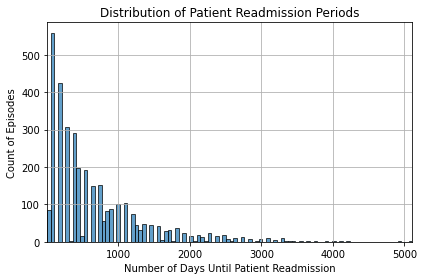

In [134]:
num_bins = 100
# Calculate the range of data on the x-axis
min_length = full_episodes['tillnextepisode'].min()
max_length = full_episodes['tillnextepisode'].max()

# Create the histogram
plt.hist(full_episodes['tillnextepisode'], bins=num_bins, edgecolor="k", alpha=0.7)

# Set labels and title
plt.xlabel("Number of Days Until Patient Readmission")
plt.ylabel("Count of Episodes")
plt.title("Distribution of Patient Readmission Periods")

# Set the x-axis limits based on the data range
plt.xlim(min_length, max_length)

# Display the grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.savefig("/home/kabank/CAMHS_Readmission_Analytics/Paper_figures/Distribution of Patient Readmission Periods.png", dpi=300)
plt.show()

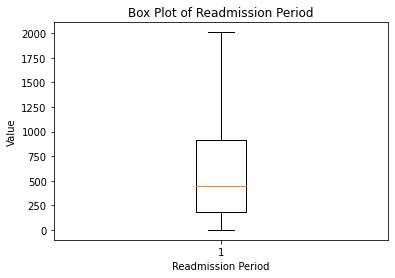

In [120]:
import matplotlib.pyplot as plt

# Filter rows where 'tillnextepisode' is not null
tillnextepisode_series = full_episodes['tillnextepisode'].dropna()

# Creating the boxplot
plt.boxplot(tillnextepisode_series, showfliers=False)
plt.xlabel('Readmission Period')
plt.ylabel('Value')
plt.title('Box Plot of Readmission Period')
plt.show()

In [121]:
len(full_episodes) 

22679

In [122]:
full_episodes["tillnextepisode"].describe()

count    3426.000000
mean      667.954174
std       688.891652
min         1.000000
25%       180.000000
50%       452.000000
75%       914.000000
max      5109.000000
Name: tillnextepisode, dtype: float64

In [123]:
full_episodes["Length_of_Episode"].describe()

count    22679.000000
mean       792.027162
std        916.116168
min          1.000000
25%        187.000000
50%        465.000000
75%       1009.000000
max       8856.000000
Name: Length_of_Episode, dtype: float64

In [124]:
full_episodes.dropna(subset=['Length_of_Episode'], inplace=True)

In [125]:
full_episodes["Length_of_Episode"].describe()

count    22679.000000
mean       792.027162
std        916.116168
min          1.000000
25%        187.000000
50%        465.000000
75%       1009.000000
max       8856.000000
Name: Length_of_Episode, dtype: float64

In [126]:
full_episodes[(full_episodes["age"] > 18) & (full_episodes["islast"] ==1)]

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode,check_TNE


In [127]:
len(full_episodes)

22679

In [128]:
if 'IsLast' in full_episodes.columns:
    full_episodes = full_episodes.drop(columns=['IsLast'])


In [129]:
full_episodes["Length_of_Episode"] = full_episodes["Length_of_Episode"].astype(int)
full_episodes["age"] = full_episodes["age"].astype(int)

In [130]:
full_episodes[full_episodes["Length_of_Episode"].isna()] # null
full_episodes[full_episodes["Length_of_Episode"]>6934] # >4000:341, >5000:106, >6000:21, >6570:4, >6934:1
full_episodes[full_episodes["tillnextepisode"]>6570] # >5000:1, >6570:0
full_episodes[(full_episodes["age"]>18) | (full_episodes["age"]<0)] # null
full_episodes[full_episodes["gender"].isna()] # null
full_episodes[full_episodes["gender"]==0] # null
full_episodes.head(3)

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode,check_TNE
0,2,3836,12,30,1.040000,F,1,1,1,1,...,26,13,5,8,0,2,NaN,NaN,732,1822
1,4,25641,13,3,1.649242,M,1,1,0,5,...,101,33,12,19,0,2,NaN,NaN,738,1451
2,6,24660,6,126,1.233893,M,1,1,3,5,...,22,16,3,3,5,1,NaN,NaN,1009,3735


In [131]:
len(full_episodes)

22679

In [132]:
#Copy full_episode to final_episode
if 'final_episodes' in locals():
    del final_episodes

original_dffinal_episodes = full_episodes

In [133]:
final_episodes.drop(columns=['check_TNE'], inplace=True)

NameError: name 'final_episodes' is not defined

In [ ]:
full_episodes.columns

Index(['pasient', 'episode_id', 'age', 'remaining_time_countdown',
       'var_no_dates_permonth', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'instanskode', 'episode_start_date',
       'episode_end_date', 'count_poliklinikk', 'count_familieavdeling',
       'count_dagavdeling', 'count_dognavdeling', 'count_osv',
       'count_outpatient', 'count_inpatient', 'count_lmssciadm',
       'count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging',
       'count_ikkemott', 'count_others', 'tillnextepisode',
       'starttillnextstart', 'Length_of_Episode'],
      dtype='object')

In [ ]:
final_episodes.to_csv("/home/kabank/workbench/.conda/analysis/Resources/final_episodes.csv")

In [ ]:
len(full_episodes) 
len(final_episodes) 

22679

# Binning

In [136]:
original_df_ = pd.read_csv("/mnt/work/workbench/dipendrp/new-data/ClusterLabel_Full_ICD10_ATC_Dummies_ICD10_ATC_50.csv") #22676
original_df = pd.read_csv("/home/kabank/workbench/.conda/analysis/Resources/final_episodes.csv") #22676
data2 = original_df["Length_of_Episode"]
#print(data2)
len(data2)
len(original_df[original_df["Length_of_Episode"]>6934])
original_df["Length_of_Episode"].max()

6759

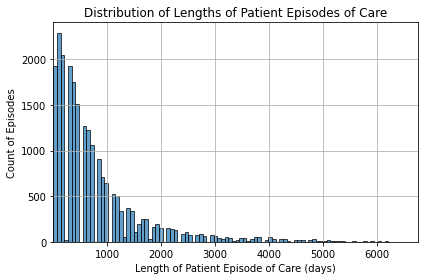

In [137]:
num_bins = 100
# Calculate the range of data on the x-axis
min_length = original_df['Length_of_Episode'].min()
max_length = original_df['Length_of_Episode'].max()


# Create the histogram
plt.hist(original_df['Length_of_Episode'], bins=num_bins, edgecolor="k", alpha=0.7)
# Set labels and title
plt.xlabel("Length of Patient Episode of Care (days)")
plt.ylabel("Count of Episodes")
plt.title("Distribution of Lengths of Patient Episodes of Care")

# Set the x-axis limits based on the data range
plt.xlim(min_length, max_length)

# Display the grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.savefig("/home/kabank/CAMHS_Readmission_Analytics/Paper_figures/Distribution of Lengths of Patient Episodes of Care.png", dpi=300)
plt.show()

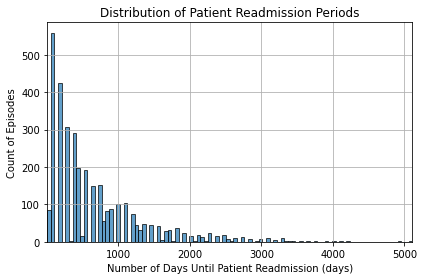

In [138]:
num_bins = 100
# Calculate the range of data on the x-axis
min_length = original_df['tillnextepisode'].min()
max_length = original_df['tillnextepisode'].max()

# Create the histogram
plt.hist(original_df['tillnextepisode'], bins=num_bins, edgecolor="k", alpha=0.7)

# Set labels and title
plt.xlabel("Number of Days Until Patient Readmission (days)")
plt.ylabel("Count of Episodes")
plt.title("Distribution of Patient Readmission Periods")

# Set the x-axis limits based on the data range
plt.xlim(min_length, max_length)

# Display the grid and show the plot
plt.grid(True)
plt.tight_layout()
plt.savefig("/home/kabank/CAMHS_Readmission_Analytics/Paper_figures/Distribution of Patient Readmission Periods.png", dpi=300)
plt.show()

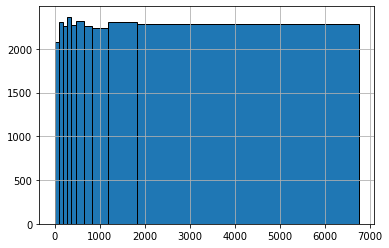

In [139]:
# look at Length_of_Episode
data2 = original_df["Length_of_Episode"]
# min_length = original_df["Length_of_Episode"].min()
# max_length = 4200
#define function to calculate equal-frequency bins 
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(data2, equalObs(data2, 10), edgecolor='black')
#plt.xlim(min_length, max_length)
plt.grid(True)
plt.show()

In [140]:
bins, n

(array([1.000e+00, 9.200e+01, 1.830e+02, 2.750e+02, 3.680e+02, 4.650e+02,
        6.430e+02, 8.310e+02, 1.192e+03, 1.832e+03, 6.759e+03]),
 array([2075., 2302., 2262., 2366., 2274., 2316., 2257., 2238., 2301.,
        2285.]))

In [142]:
original_df.dropna(subset=['Length_of_Episode'], inplace=True)


In [143]:
for i in range(len(original_df["Length_of_Episode"])):
    if 0 <= original_df.iloc[i]["Length_of_Episode"] <= 92: 
        original_df.loc[i, 'Cat_LOE'] = 1
    elif 92 < original_df.iloc[i]["Length_of_Episode"] <=183: 
        original_df.loc[i, 'Cat_LOE'] = 2 
    elif 183 < original_df.iloc[i]["Length_of_Episode"] <=275: 
        original_df.loc[i, 'Cat_LOE'] = 3
    elif 275 < original_df.iloc[i]["Length_of_Episode"] <=368: 
        original_df.loc[i, 'Cat_LOE'] = 4
    elif 368 < original_df.iloc[i]["Length_of_Episode"] <=466: 
        original_df.loc[i, 'Cat_LOE'] = 5
    elif 466 < original_df.iloc[i]["Length_of_Episode"] <=645: 
        original_df.loc[i, 'Cat_LOE'] = 6
    elif 645 < original_df.iloc[i]["Length_of_Episode"] <=908: 
        original_df.loc[i, 'Cat_LOE'] = 7
    elif 908 < original_df.iloc[i]["Length_of_Episode"] <=1194: 
        original_df.loc[i, 'Cat_LOE'] = 8
    elif 1194 < original_df.iloc[i]["Length_of_Episode"] <=1921: 
        original_df.loc[i, 'Cat_LOE'] = 9
    elif 1921 < original_df.iloc[i]["Length_of_Episode"] <=6759: 
        original_df.loc[i, 'Cat_LOE'] = 10
    else:
        print(f"Value {original_df.iloc[i]['Length_of_Episode']} at index {i} is not categorized.")
        # Assign a default category or handle as needed
        original_df.loc[i, 'Cat_LOE'] = 11


In [144]:
original_df.head(3)

,pasient,episode_id,episode_start_date,episode_end_date,gender,age,diagnosis,actual_med_Full_ATC,MiddleChildhood,Preschooler,...,Advisory_ratio,tillnextepisode,age_group,Examination_ratio,Inpatient_ratio,Inpatient_daynight_ratio,tillnextepisode_label,cluster,cluster_distances,Cat_LOE
0,2,3836.0,2013-07-02,2015-07-03,F,12,"['F930', 'F431']",NaN,0,0,...,0.096,NaN,Teenager,0.250,0.0,0.0,5,3,3.565295,7.0
1,4,25641.0,2015-09-28,2017-10-04,M,13,"['F429', 'F422']",NaN,0,0,...,0.073,NaN,Teenager,0.200,0.0,0.0,5,3,3.073909,7.0
2,6,24660.0,2004-10-01,2007-07-06,M,6,NaN,NaN,1,0,...,0.068,NaN,MiddleChildhood,0.364,0.0,0.0,5,3,2.978135,8.0


In [145]:
original_df['tillnextepisode'].describe()

count    3426.000000
mean      667.954174
std       688.891652
min         1.000000
25%       180.000000
50%       452.000000
75%       914.000000
max      5109.000000
Name: tillnextepisode, dtype: float64

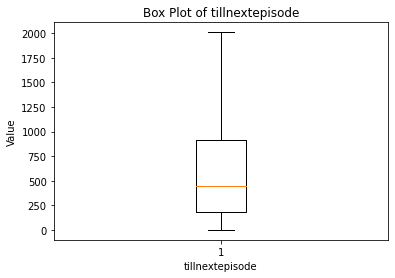

In [146]:
# Filter rows where 'tillnextepisode' is not null
tillnextepisode_series = original_df['tillnextepisode'].dropna()

# Creating the boxplot
plt.boxplot(tillnextepisode_series, showfliers=False)
plt.xlabel('tillnextepisode')
plt.ylabel('Value')
plt.title('Box Plot of tillnextepisode')
plt.show()

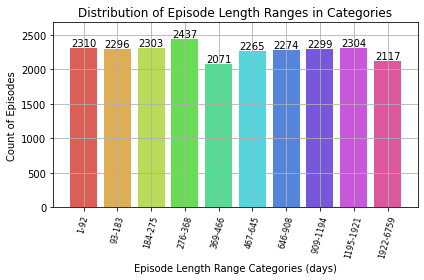

In [149]:
LOE_1 = len(original_df[original_df['Cat_LOE']==1]) 
LOE_2 = len(original_df[original_df['Cat_LOE']==2]) 
LOE_3 = len(original_df[original_df['Cat_LOE']==3]) 
LOE_4 = len(original_df[original_df['Cat_LOE']==4]) 
LOE_5 = len(original_df[original_df['Cat_LOE']==5]) 
LOE_6 = len(original_df[original_df['Cat_LOE']==6]) 
LOE_7 = len(original_df[original_df['Cat_LOE']==7]) 
LOE_8 = len(original_df[original_df['Cat_LOE']==8]) 
LOE_9 = len(original_df[original_df['Cat_LOE']==9])
LOE_10 = len(original_df[original_df['Cat_LOE']==10])  

# Categories for the x-axis
categories = ['1-92', '93-183', '184-275', '276-368', '369-466', '467-645', '646-908', '909-1194', '1195-1921', '1922-6759']

# Counts for each category
counts = [LOE_1, LOE_2, LOE_3, LOE_4, LOE_5, LOE_6, LOE_7, LOE_8, LOE_9, LOE_10]
#colors = sns.color_palette("colorblind", 10)
colors = sns.color_palette("hls", 10)
# Plot a grouped bar chart
bars = plt.bar(categories, counts, color=colors)
#bars = plt.bar(categories, counts, color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'olive', 'cyan', 'yellow'])
plt.xlabel('Episode Length Range Categories (days)')
plt.ylabel('Count of Episodes')
plt.xticks(rotation=75, fontsize=8)
plt.title('Distribution of Episode Length Ranges in Categories')
plt.grid(True)
# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)
 # Set y-axis limit
plt.ylim(0, max(counts) * 1.1)  # 1.1 gives 10% padding at the top
plt.tight_layout()
plt.savefig("/home/kabank/CAMHS_Readmission_Analytics/Paper_figures/Distribution of Episode Length Ranges in Categories.png", dpi=300)
plt.show()

In [ ]:
grouped = final_episodes.groupby('Cat_LOE').size().reset_index(name='count')
print(grouped)

    Cat_LOE  count
0       1.0   1950
1       2.0   2275
2       3.0   2046
3       4.0   2070
4       5.0   3139
5       6.0   1264
6       7.0   3197
7       8.0   2381
8       9.0   2154
9      10.0   2201
10     11.0      2


In [ ]:
final_episodes[final_episodes['Cat_LOE']==11]

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,count_terapi,count_undersokelse,count_radge,count_behplanlegging,count_ikkemott,count_others,tillnextepisode,starttillnextstart,Length_of_Episode,Cat_LOE
1014,1099.0,7679.0,10.0,6.0,2.185294,M,1.0,1.0,1.0,4.0,...,12.0,9.0,3.0,6.0,0.0,4.0,NaN,NaN,186.0,11.0
20999,22526.0,4745.0,9.0,60.0,0.881411,F,1.0,1.0,1.0,4.0,...,26.0,18.0,28.0,3.0,0.0,0.0,NaN,NaN,4385.0,11.0


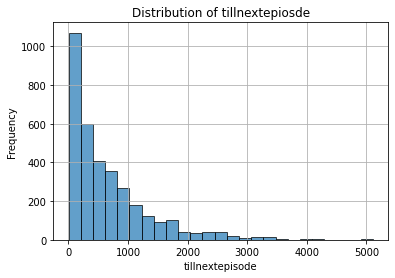

In [ ]:
# look at tillnextepisode
plt.hist(final_episodes['tillnextepisode'], bins=25, edgecolor="k", alpha=0.7)
plt.xlabel("tillnextepisode")
plt.ylabel("Frequency")
plt.title("Distribution of tillnextepiosde")
plt.grid(True)
plt.show()


In [ ]:
#looking at 'tillnextepiosde'
final_episodes['tillnextepisode'].describe() 

count    3426.000000
mean      667.954174
std       688.891652
min         1.000000
25%       180.000000
50%       452.000000
75%       914.000000
max      5109.000000
Name: tillnextepisode, dtype: float64

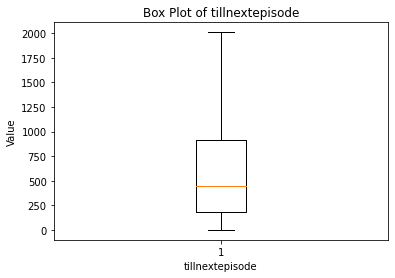

In [ ]:
# Filter rows where 'tillnextepisode' is not null
tillnextepisode_series = final_episodes['tillnextepisode'].dropna()

# Creating the boxplot
plt.boxplot(tillnextepisode_series, showfliers=False)
plt.xlabel('tillnextepisode')
plt.ylabel('Value')
plt.title('Box Plot of tillnextepisode')
plt.show()

<Figure size 864x576 with 0 Axes>

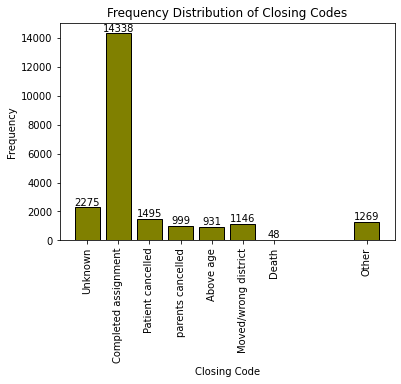

In [ ]:
def custom_labels(label):
    label_mapping = {
        0: 'Unknown',
        1: 'Completed assignment',
        2: 'Patient cancelled',
        3: 'parents cancelled',
        4: 'Above age',
        5: 'Moved/wrong district',
        6: 'Death',
        7: 'Rejection',
        8: 'Did not get started',
        9: 'Other'
    }
    return label_mapping.get(label, label)

plt.figure(figsize=(12, 8))

counts = final_episodes['closingcode'].value_counts()
counts = counts.sort_index()
fig, ax = plt.subplots()
bars = ax.bar(counts.index, counts.values, color='olive', edgecolor='black')

plt.xlabel('Closing Code', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency Distribution of Closing Codes', fontsize=12)
plt.xticks(counts.index, [custom_labels(label) for label in counts.index], rotation=90)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

<Figure size 864x576 with 0 Axes>

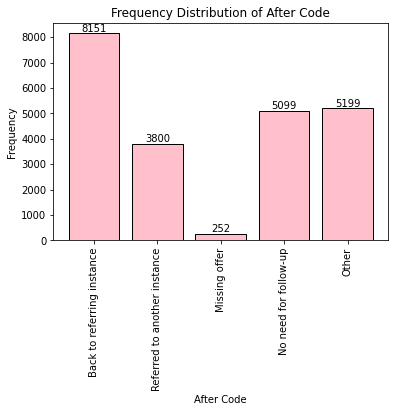

In [ ]:
# after code
def custom_labels(label):
    label_mapping = {
        1: 'Back to referring instance',
        2: 'Referred to another instance',
        3: 'Missing offer',
        4: 'No need for follow-up',
        5: 'Other' # what is it?
    }
    return label_mapping.get(label, label)

plt.figure(figsize=(12, 8))

counts = final_episodes['aftercode'].value_counts()
counts = counts.sort_index()
fig, ax = plt.subplots()
bars = ax.bar(counts.index, counts.values, color='pink', edgecolor='black')

plt.xlabel('After Code', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency Distribution of After Code', fontsize=12)
plt.xticks(counts.index, [custom_labels(label) for label in counts.index], rotation=90)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()


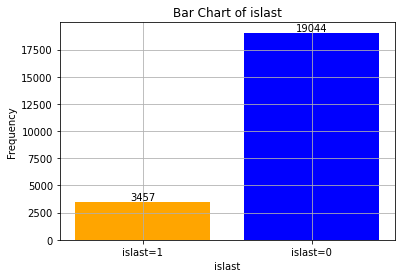

In [ ]:
islast_counts = final_episodes['islast'].value_counts()

# Plot a bar chart
bars = plt.bar(islast_counts.index, islast_counts.values, tick_label=['islast=0', 'islast=1'], color=['blue', 'orange'])
plt.xlabel('islast')
plt.ylabel('Frequency')
plt.title('Bar Chart of islast')
plt.grid(True)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black')

plt.show()

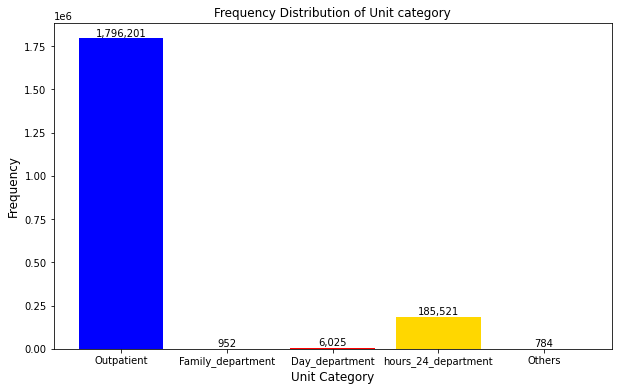

In [ ]:
#Unit Category, count of care sessions, care intervals
Outpatient = final_episodes['count_poliklinikk'].sum() 
Family_department = final_episodes['count_familieavdeling'].sum() 
Day_department = final_episodes['count_dagavdeling'].sum() 
hours_24_department = final_episodes['count_dognavdeling'].sum() 
Others = final_episodes['count_osv'].sum()

plt.figure(figsize=(10, 6))

data = [Outpatient, Family_department, Day_department, hours_24_department, Others]
#data = [1869842, 198953, 6120, 959, 829]
labels = ['Outpatient', 'Family_department', 'Day_department', 'hours_24_department','Others']
colors = ['blue', 'green', 'red', 'gold', 'pink'] 

bars = plt.bar(labels, data, color=colors)

plt.xlabel('Unit Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency Distribution of Unit category', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    formatted_yval = "{:,.0f}".format(yval) 
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_yval, ha='center', va='bottom', color='black')
plt.show()


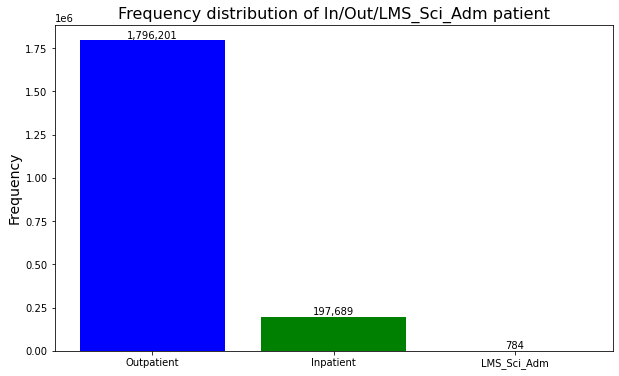

In [ ]:
#in/out/else patient episode
outpatient = final_episodes['count_outpatient'].sum() #1869842
inpatient = final_episodes['count_inpatient'].sum() #211240
LMS_Sci_Adm = final_episodes['count_lmssciadm'].sum() #829

plt.figure(figsize=(10, 6))

data = [outpatient, inpatient, LMS_Sci_Adm]
labels = ['Outpatient','Inpatient','LMS_Sci_Adm']
colors = ['blue', 'green', 'red']
bars = plt.bar(labels, data, color=colors)  

#plt.xlabel('in/out/else patient', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency distribution of In/Out/LMS_Sci_Adm patient', fontsize=16)

for bar in bars:
    yval = bar.get_height()
    formatted_yval = "{:,.0f}".format(yval) 
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_yval, ha='center', va='bottom', color='black')
plt.show()

#how many days, inpatients 


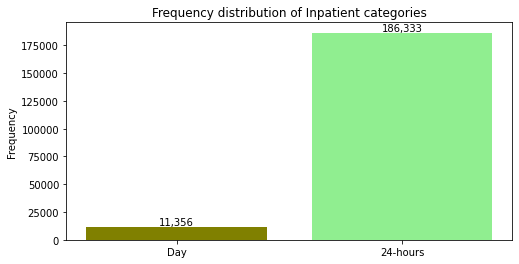

In [ ]:
#Inpatient categories
inpatient_day = final_episodes['count_inpatient_day'].sum() #11458
inpatient_24_hours = final_episodes['count_inpatient_daynight'].sum() #199782

plt.figure(figsize=(8, 4))

data = [inpatient_day, inpatient_24_hours]
labels = ['Day', '24-hours']
colors = ['olive', 'lightgreen']
bars = plt.bar(labels, data, color=colors)  

#plt.xlabel('in/out/else patient', fontsize=14)
plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency distribution of Inpatient categories', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    formatted_yval = "{:,.0f}".format(yval) 
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_yval, ha='center', va='bottom', color='black')
plt.show()


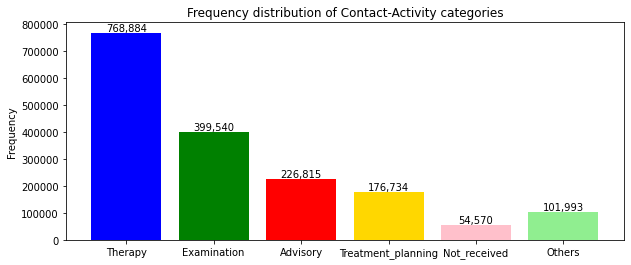

In [ ]:
#Contact-activity categories
Therapy = final_episodes['count_terapi'].sum() #796,913
Examination = final_episodes['count_undersokelse'].sum() #413,850
Advisory = final_episodes['count_radge'].sum() #234,289
Treatment_planning = final_episodes['count_behplanlegging'].sum() #182,555
Not_received = final_episodes['count_ikkemott'].sum() #56,560
Others = final_episodes['count_others'].sum() #109,053

plt.figure(figsize=(10, 4))

data = [Therapy, Examination, Advisory, Treatment_planning, Not_received, Others]
labels = ['Therapy', 'Examination', 'Advisory', 'Treatment_planning', 'Not_received', 'Others']
colors = ['blue', 'green', 'red', 'gold', 'pink', 'lightgreen'] 
bars = plt.bar(labels, data, color=colors)  

plt.ylabel('Frequency', fontsize=10)
plt.title('Frequency distribution of Contact-Activity categories', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    formatted_yval = "{:,.0f}".format(yval) 
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_yval, ha='center', va='bottom', color='black')
plt.show()


In [ ]:
final_episodes.head()

,pasient,episode_id,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,closingcode,aftercode,...,Length_of_Episode,Cat_LOE,TNE_BO_180,TNE_NO_180,TNE_BO_365,TNE_NO_365,TNE_BO_730,TNE_NO_730,TNE_BO_1095,TNE_NO_1095
0,2.0,3836.0,12.0,30.0,1.040000,F,1.0,1.0,1.0,1.0,...,732.0,7.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
1,4.0,25641.0,13.0,3.0,1.649242,M,1.0,1.0,0.0,5.0,...,738.0,7.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2,6.0,24660.0,6.0,126.0,1.233893,M,1.0,1.0,3.0,5.0,...,1009.0,8.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,7.0,22380.0,8.0,15.0,1.459513,M,1.0,1.0,1.0,1.0,...,375.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
4,8.0,28188.0,16.0,156.0,1.131371,F,1.0,1.0,1.0,4.0,...,742.0,7.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN


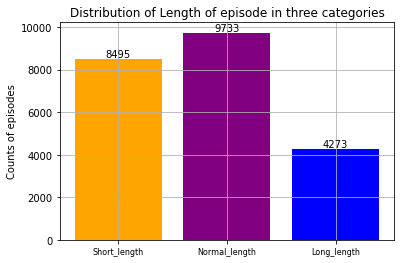

In [ ]:
Short_length  = len(final_episodes[final_episodes['Length_of_Episode']<=365]) #(0-12)m ~ (0-365)day #less than 1 year
Normal_length = len(final_episodes[(final_episodes['Length_of_Episode']>365) & (final_episodes['Length_of_Episode']<=1200)]) #(3-40)m ~ (90-1200)days #between 1 to 3.33 years
Long_length = len(final_episodes[final_episodes['Length_of_Episode']>1200]) #more than 3.33 years

counts = [Short_length, Normal_length, Long_length]
categories = ['Short_length', 'Normal_length', 'Long_length']

# Plot a grouped bar chart
bars = plt.bar(categories, counts, color = ['orange','purple','blue'])

plt.ylabel('Counts of episodes')
plt.xticks(fontsize=8)
plt.title('Distribution of Length of episode in three categories')
plt.grid(True)


# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()

In [ ]:
final_episodes['Length_of_Episode'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
22674    False
22675    False
22676    False
22677    False
22678    False
Name: Length_of_Episode, Length: 22501, dtype: bool

In [ ]:
print("Number of null values before drop:", final_episodes['Length_of_Episode'].isnull().sum())
print("Number of NaN values before drop:", final_episodes['Length_of_Episode'].isna())
final_episodes.dropna(subset=['Length_of_Episode'], inplace=True)
print("Number of null values after drop:", final_episodes['Length_of_Episode'].isnull().sum())
print("Number of NaN values after drop:", final_episodes['Length_of_Episode'].isna())


Number of null values before drop: 0
Number of NaN values before drop: 0        False
1        False
2        False
3        False
4        False
         ...  
22674    False
22675    False
22676    False
22677    False
22678    False
Name: Length_of_Episode, Length: 22501, dtype: bool
Number of null values after drop: 0
Number of NaN values after drop: 0        False
1        False
2        False
3        False
4        False
         ...  
22674    False
22675    False
22676    False
22677    False
22678    False
Name: Length_of_Episode, Length: 22501, dtype: bool


In [ ]:
final_episodes["Length_of_Episode"].astype(int)

0         732
1         738
2        1009
3         375
4         742
         ... 
22674    3202
22675    1468
22676     911
22677    1012
22678    2742
Name: Length_of_Episode, Length: 22501, dtype: int64

In [ ]:
if 'Cat_LOE_desc' in final_episodes.columns:
    final_episodes.drop(columns=['Cat_LOE_desc'], inplace=True)


In [ ]:
# Define the bin edges and labels
bin_edges = [-float('inf'), 365, 1200, float('inf')]
bin_labels = [1, 2, 3]

# Apply the categorization
final_episodes['Cat_LOE_desc'] = pd.cut(final_episodes['Length_of_Episode'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# If you want to handle the 'else' case separately (setting it to 1000), you can use fillna
#final_episodes['Cat_LOE_desc'] = final_episodes['Cat_LOE_desc'].fillna(1000).astype(int)


In [ ]:
final_episodes.columns

Index(['pasient', 'episode_id', 'age', 'remaining_time_countdown',
       'var_no_dates_permonth', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'instanskode', 'episode_start_date',
       'episode_end_date', 'count_poliklinikk', 'count_familieavdeling',
       'count_dagavdeling', 'count_dognavdeling', 'count_osv',
       'count_outpatient', 'count_inpatient', 'count_lmssciadm',
       'count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging',
       'count_ikkemott', 'count_others', 'tillnextepisode',
       'starttillnextstart', 'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180',
       'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730',
       'TNE_BO_1095', 'TNE_NO_1095', 'Cat_LOE_desc'],
      dtype='object')

In [ ]:
final_episodes.dropna(subset=["Length_of_Episode"], inplace=True)

In [ ]:
len(final_episodes[final_episodes["Length_of_Episode"].isna()])

0

In [ ]:
len(final_episodes)

22501

In [ ]:
# making feature count visit that is count of patients contacts in Journal
final_episodes['Count_visit'] = final_episodes['count_inpatient'] + final_episodes['count_outpatient']

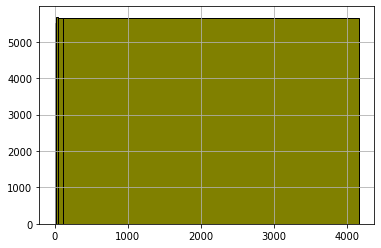

In [ ]:
import matplotlib.pyplot as plt
min_length = final_episodes['Count_visit'].min()
max_length = final_episodes['Count_visit'].max()
#define function to calculate equal-frequency bins 
def equalbs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins 
n, bins, patches = plt.hist(final_episodes['Count_visit'], equalbs(final_episodes['Count_visit'], 4), edgecolor='black', color='olive')
#plt.xlim(min_length, max_length)
plt.grid(True)
plt.show()

In [ ]:
bins

array([   0.,   16.,   50.,  110., 4159.])

In [ ]:
import pandas as pd

# Assuming 'your_dataframe' is the name of your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame

# Define the bin edges based on the percentiles you provided
bin_edges = [0, 1, 14, 44, 102, float('inf')]  # Adjust the intervals as needed

# Define the corresponding labels for each category
bin_labels = ['1', '2', '3', '4', '5']

# Use pd.cut to create the "Cat_CV" column with the specified categories
final_episodes['Cat_CV'] = pd.cut(final_episodes['Count_visit'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display the resulting DataFrame
print(final_episodes[['Count_visit', 'Cat_CV']])


       Count_visit Cat_CV
0             49.0      4
1            160.0      5
2             98.0      4
3             80.0      4
4             52.0      4
...            ...    ...
22674        226.0      5
22675        249.0      5
22676        408.0      5
22677        114.0      5
22678         74.0      4

[22501 rows x 2 columns]


for i in range(len(final_episodes['Count_visit'])):
    if final_episodes.iloc[i]['Count_visit'] == 0: # 0
        final_episodes.loc[i, 'Cat_CV'] = 0
    elif final_episodes.iloc[i]['Count_visit'] > 100: # more than 100
        final_episodes.loc[i, 'Cat_CV'] = 4
    elif 50 < final_episodes.iloc[i]['Count_visit'] <= 100: # 50-100 visits
        final_episodes.loc[i, 'Cat_CV'] = 3
    elif 15 < final_episodes.iloc[i]['Count_visit'] <= 50: # 15-50 visits
        final_episodes.loc[i, 'Cat_CV'] = 2 
    elif 1 <= final_episodes.iloc[i]['Count_visit'] <= 15: # 1-15 visits
        final_episodes.loc[i, 'Cat_CV'] = 1


In [ ]:
len(final_episodes[final_episodes['Cat_CV']==0]) #288
len(final_episodes[final_episodes['Cat_CV']==1]) #4096
len(final_episodes[final_episodes['Cat_CV']==2]) #4207
len(final_episodes[final_episodes['Cat_CV']==3]) #3248
len(final_episodes[final_episodes['Cat_CV']==4]) #3821

0

In [ ]:
# making a new feature
final_episodes['C_service_visit'] = final_episodes['count_terapi'] + final_episodes['count_undersokelse'] + final_episodes['count_radge'] + final_episodes['count_behplanlegging']
# converting continuous values for Variable "C_service_visit" to be as one-hot encoding categories 
final_episodes['Therapy_ratio'] = (final_episodes['count_terapi']/final_episodes['C_service_visit']).astype(float).round(3)
final_episodes['Examination_ratio'] = (final_episodes['count_undersokelse']/final_episodes['C_service_visit']).astype(float).round(3)
final_episodes['Advisory_ratio'] = (final_episodes['count_radge']/final_episodes['C_service_visit']).astype(float).round(3)
final_episodes['TreatmentPlanning_ratio'] = (final_episodes['count_behplanlegging']/final_episodes['C_service_visit']).astype(float).round(3)

In [ ]:
# making some features with value between 0 and 1
final_episodes['Outpatient_ratio'] = (final_episodes['count_outpatient']/final_episodes['Count_visit']).astype(float).round(3)
final_episodes['Inpatient_ratio'] = (final_episodes['count_inpatient']/final_episodes['Count_visit']).astype(float).round(3)

In [ ]:
# making some features with value between 0 and 1
final_episodes['Inpatient_day_ratio'] = (final_episodes['count_inpatient_day']/final_episodes['count_inpatient']).astype(float).round(3)
final_episodes['Inpatient_daynight_ratio'] = (final_episodes['count_inpatient_daynight']/final_episodes['count_inpatient']).astype(float).round(3)

In [ ]:
final_episodes['Care_intensity'] = final_episodes['Count_visit'] / final_episodes['Length_of_Episode']

In [ ]:
final_episodes.columns

Index(['pasient', 'episode_id', 'age', 'remaining_time_countdown',
       'var_no_dates_permonth', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'instanskode', 'episode_start_date',
       'episode_end_date', 'count_poliklinikk', 'count_familieavdeling',
       'count_dagavdeling', 'count_dognavdeling', 'count_osv',
       'count_outpatient', 'count_inpatient', 'count_lmssciadm',
       'count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging',
       'count_ikkemott', 'count_others', 'tillnextepisode',
       'starttillnextstart', 'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180',
       'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730',
       'TNE_BO_1095', 'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV',
       'C_service_visit', 'Therapy_ratio', 'Examination_ratio',
       'Advisory_ratio', 'TreatmentPlanning_ratio', 'Outpatient_ratio',
       'Inpatient_ratio

In [ ]:
#drop the columns that we dont need
final_episodes.drop(['instanskode', 'count_poliklinikk', 'count_familieavdeling', 'count_dagavdeling', 'count_dognavdeling', 'count_osv',
       'count_outpatient', 'count_inpatient', 'count_lmssciadm','count_inpatient_day', 'count_inpatient_daynight', 'count_terapi',
       'count_undersokelse', 'count_radge', 'count_behplanlegging','count_ikkemott', 'count_others','starttillnextstart', 'C_service_visit'], axis=1, inplace= True)

In [ ]:
final_episodes.iloc[2, :]

pasient                            6.0
episode_id                     24660.0
age                                6.0
remaining_time_countdown         126.0
var_no_dates_permonth         1.233893
gender                               M
episode_order                      1.0
islast                             1.0
closingcode                        3.0
aftercode                          5.0
episode_start_date          2004-10-01
episode_end_date            2007-07-06
tillnextepisode                    NaN
Length_of_Episode               1009.0
Cat_LOE                            8.0
TNE_BO_180                         0.0
TNE_NO_180                         NaN
TNE_BO_365                         0.0
TNE_NO_365                         NaN
TNE_BO_730                         0.0
TNE_NO_730                         NaN
TNE_BO_1095                        0.0
TNE_NO_1095                        NaN
Cat_LOE_desc                         2
Count_visit                       98.0
Cat_CV                   

In [ ]:
final_episodes.dropna(subset=["Length_of_Episode"], inplace=True)
final_episodes.dropna(subset=["Cat_LOE"], inplace=True)

In [ ]:
len(final_episodes) 

22501

In [ ]:
final_episodes.loc[final_episodes["age"].between(0, 5), ["age_group"]] = "Preschooler"
final_episodes.loc[final_episodes["age"].between(6, 11), ["age_group"]] = "MiddleChildhood"
final_episodes.loc[final_episodes["age"].between(12, 18), ["age_group"]] = "Teenager" 
final_episodes.loc[final_episodes["age"].between(19, 60), ["age_group"]] = "Adult"

In [ ]:
final_episodes.columns

Index(['pasient', 'episode_id', 'age', 'remaining_time_countdown',
       'var_no_dates_permonth', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'episode_start_date', 'episode_end_date',
       'tillnextepisode', 'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180',
       'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730',
       'TNE_BO_1095', 'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV',
       'Therapy_ratio', 'Examination_ratio', 'Advisory_ratio',
       'TreatmentPlanning_ratio', 'Outpatient_ratio', 'Inpatient_ratio',
       'Inpatient_day_ratio', 'Inpatient_daynight_ratio', 'Care_intensity',
       'age_group'],
      dtype='object')

In [ ]:
final_episodes.to_csv("/home/kabank/workbench/.conda/analysis/kabank-data/final_episodes.csv", index=False)

In [ ]:
final_episodes1 = final_episodes.copy()
final_episodes1['closingcode'] = final_episodes1['closingcode'].astype(int)

In [ ]:
for index, row in final_episodes1.iterrows():
    if row['closingcode'] == 0:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_0'
    elif row['closingcode'] == 1:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_1'
    elif row['closingcode'] == 2:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_2'
    elif row['closingcode'] == 3:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_3'
    elif row['closingcode'] == 4:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_4'
    elif row['closingcode'] == 5:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_5'
    elif row['closingcode'] == 6:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_6'
    elif row['closingcode'] == 7:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_7'
    elif row['closingcode'] == 8:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_8'
    elif row['closingcode'] == 9:
        final_episodes1.at[index, 'closingcode'] = 'closingcode_9'
    else:
        final_episodes1.at[index, 'closingcode'] = 'xxxxxx'


In [ ]:
for index, row in final_episodes1.iterrows():
    if row['aftercode'] == 0:
        final_episodes1.at[index, 'aftercode'] = 'aftercode_0'
    elif row['aftercode'] == 1:
        final_episodes1.at[index, 'aftercode'] = 'aftercode_1'
    elif row['aftercode'] == 2:
        final_episodes1.at[index, 'aftercode'] = 'aftercode_2'
    elif row['aftercode'] == 3:
        final_episodes1.at[index, 'aftercode'] = 'aftercode_3'
    elif row['aftercode'] == 4:
        final_episodes1.at[index, 'aftercode'] = 'aftercode_4'
    elif row['aftercode'] == 5:
        final_episodes1.at[index, 'aftercode'] = 'aftercode_5'
    else:
        final_episodes1.at[index, 'aftercode'] = 'xxxxxx'


In [ ]:
final_episodes1.columns

Index(['pasient', 'episode_id', 'age', 'remaining_time_countdown',
       'var_no_dates_permonth', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'episode_start_date', 'episode_end_date',
       'tillnextepisode', 'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180',
       'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730',
       'TNE_BO_1095', 'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV',
       'Therapy_ratio', 'Examination_ratio', 'Advisory_ratio',
       'TreatmentPlanning_ratio', 'Outpatient_ratio', 'Inpatient_ratio',
       'Inpatient_day_ratio', 'Inpatient_daynight_ratio', 'Care_intensity',
       'age_group'],
      dtype='object')

In [ ]:
len(final_episodes1[final_episodes1['gender']=='0'])

47

In [ ]:
# Binarize and one-hot encode 
lb = LabelBinarizer()
ohe = OneHotEncoder()

# 'closingcode' is a column with categorical values
binarized_closingcode = pd.DataFrame(lb.fit_transform(final_episodes1['closingcode']),
                                      columns=lb.classes_,
                                      index=final_episodes1.index)

final_episodes1 = pd.concat([final_episodes1, binarized_closingcode], axis=1)

# 'aftercode' is a column with categorical values
binarized_aftercode = pd.DataFrame(lb.fit_transform(final_episodes1['aftercode']),
                                      columns=lb.classes_,
                                      index=final_episodes1.index)

final_episodes1 = pd.concat([final_episodes1, binarized_aftercode], axis=1)


 # 'gender' is a column with categorical values
binarized_gender = pd.DataFrame(lb.fit_transform(final_episodes1['gender']),
                                      columns=lb.classes_,
                                      index=final_episodes1.index)
final_episodes1 = pd.concat([final_episodes1, binarized_gender], axis=1)

# 'age_group' is a column with categorical values
binarized_age_group = pd.DataFrame(lb.fit_transform(final_episodes1['age_group']),
                                      columns=lb.classes_,
                                      index=final_episodes1.index)                                     

final_episodes1 = pd.concat([final_episodes1, binarized_age_group], axis=1)
final_episodes1.rename(columns={'0': 'gender_0'}, inplace=True)
# Print the columns of the updated DataFrame
print(final_episodes1.columns)

Index(['pasient', 'episode_id', 'age', 'remaining_time_countdown',
       'var_no_dates_permonth', 'gender', 'episode_order', 'islast',
       'closingcode', 'aftercode', 'episode_start_date', 'episode_end_date',
       'tillnextepisode', 'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180',
       'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730',
       'TNE_BO_1095', 'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV',
       'Therapy_ratio', 'Examination_ratio', 'Advisory_ratio',
       'TreatmentPlanning_ratio', 'Outpatient_ratio', 'Inpatient_ratio',
       'Inpatient_day_ratio', 'Inpatient_daynight_ratio', 'Care_intensity',
       'age_group', 'closingcode_0', 'closingcode_1', 'closingcode_2',
       'closingcode_3', 'closingcode_4', 'closingcode_5', 'closingcode_6',
       'closingcode_9', 'aftercode_1', 'aftercode_2', 'aftercode_3',
       'aftercode_4', 'aftercode_5', 'gender_0', 'F', 'M', 'MiddleChildhood',
       'Preschooler', 'Teenager'],
      dtype='object'

In [ ]:
final_episodes1.to_csv("/home/kabank/workbench/.conda/analysis/kabank-data/final_episodes-OneHotet.csv", index=False)

# Adding some more features like count of diagnoses and medications

In [ ]:
# Data input
df = pd.read_csv("/home/kabank/workbench/.conda/analysis/kabank-data/diagnoses_atc_episode.csv")

In [ ]:
df.shape #(17798, 4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16390 entries, 0 to 16389
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   episode_id  16390 non-null  float64
 1   diagnoses   16390 non-null  object 
 2   atc_codes   16390 non-null  object 
 3   diag_atc    16390 non-null  object 
dtypes: float64(1), object(3)
memory usage: 512.3+ KB


In [ ]:
df.head()

,episode_id,diagnoses,atc_codes,diag_atc
0,10.0,"['3009', '313', '3131']",[],"['3009', '313', '3131']"
1,10001.0,"['2972', '969']",[],"['2972', '969']"
2,10002.0,['3131'],"['999140602', '999010602']","['3131', '999140602', '999010602']"
3,10003.0,['312'],[],['312']
4,10004.0,"['563', '313', '3131']",['999140602'],"['563', '313', '3131', '999140602']"


In [ ]:
# calculate and add column 'num_diagnoses'
df['num_diagnoses'] = df['diagnoses'].str.strip('[]').str.split(',').apply(len)


In [ ]:
# calculate and add column 'num_medications'
import ast

def count_items(s):
    try:
        items = ast.literal_eval(s)
        return len(items)
    except (SyntaxError, ValueError):
        return 0

df['num_medications'] = df['atc_codes'].apply(count_items)


In [ ]:
df['num_medications'].max() # min:0, max=7
df['num_diagnoses'].min() # min:1, max=10

1

In [ ]:
df.columns

Index(['episode_id', 'diagnoses', 'atc_codes', 'diag_atc', 'num_diagnoses',
       'num_medications'],
      dtype='object')

In [ ]:
ddf = df[['episode_id','num_diagnoses', 'num_medications']].astype(int)

In [ ]:
#merging other features with number of diagnoses and medications
final_episodes2 = pd.merge(ddf, final_episodes1, on='episode_id', how='right')

In [ ]:
print(len(final_episodes2)) #15372
final_episodes2.columns

22501


Index(['episode_id', 'num_diagnoses', 'num_medications', 'pasient', 'age',
       'remaining_time_countdown', 'var_no_dates_permonth', 'gender',
       'episode_order', 'islast', 'closingcode', 'aftercode',
       'episode_start_date', 'episode_end_date', 'tillnextepisode',
       'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180', 'TNE_NO_180',
       'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730', 'TNE_BO_1095',
       'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV', 'Therapy_ratio',
       'Examination_ratio', 'Advisory_ratio', 'TreatmentPlanning_ratio',
       'Outpatient_ratio', 'Inpatient_ratio', 'Inpatient_day_ratio',
       'Inpatient_daynight_ratio', 'Care_intensity', 'age_group',
       'closingcode_0', 'closingcode_1', 'closingcode_2', 'closingcode_3',
       'closingcode_4', 'closingcode_5', 'closingcode_6', 'closingcode_9',
       'aftercode_1', 'aftercode_2', 'aftercode_3', 'aftercode_4',
       'aftercode_5', 'gender_0', 'F', 'M', 'MiddleChildhood', 'Preschooler

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
final_episodes2.iloc[2, :]

episode_id                          24660.0
num_diagnoses                           NaN
num_medications                         NaN
pasient                                 6.0
age                                     6.0
remaining_time_countdown              126.0
var_no_dates_permonth              1.233893
gender                                    M
episode_order                           1.0
islast                                  1.0
closingcode                   closingcode_3
aftercode                       aftercode_5
episode_start_date               2004-10-01
episode_end_date                 2007-07-06
tillnextepisode                         NaN
Length_of_Episode                    1009.0
Cat_LOE                                 8.0
TNE_BO_180                              0.0
TNE_NO_180                              NaN
TNE_BO_365                              0.0
TNE_NO_365                              NaN
TNE_BO_730                              0.0
TNE_NO_730                      

In [ ]:
final_episodes2[final_episodes2['Length_of_Episode']<=0]

,episode_id,num_diagnoses,num_medications,pasient,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,...,aftercode_2,aftercode_3,aftercode_4,aftercode_5,gender_0,F,M,MiddleChildhood,Preschooler,Teenager


In [ ]:
final_episodes2[final_episodes2['tillnextepisode']<0]

,episode_id,num_diagnoses,num_medications,pasient,age,remaining_time_countdown,var_no_dates_permonth,gender,episode_order,islast,...,aftercode_2,aftercode_3,aftercode_4,aftercode_5,gender_0,F,M,MiddleChildhood,Preschooler,Teenager


In [ ]:
if 'final_episodes4' in locals():
    del final_episodes4
final_episodes4 = final_episodes2.copy()
len(final_episodes4)

22501

In [ ]:
final_episodes4.columns

Index(['episode_id', 'num_diagnoses', 'num_medications', 'pasient', 'age',
       'remaining_time_countdown', 'var_no_dates_permonth', 'gender',
       'episode_order', 'islast', 'closingcode', 'aftercode',
       'episode_start_date', 'episode_end_date', 'tillnextepisode',
       'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180', 'TNE_NO_180',
       'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730', 'TNE_BO_1095',
       'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV', 'Therapy_ratio',
       'Examination_ratio', 'Advisory_ratio', 'TreatmentPlanning_ratio',
       'Outpatient_ratio', 'Inpatient_ratio', 'Inpatient_day_ratio',
       'Inpatient_daynight_ratio', 'Care_intensity', 'age_group',
       'closingcode_0', 'closingcode_1', 'closingcode_2', 'closingcode_3',
       'closingcode_4', 'closingcode_5', 'closingcode_6', 'closingcode_9',
       'aftercode_1', 'aftercode_2', 'aftercode_3', 'aftercode_4',
       'aftercode_5', 'gender_0', 'F', 'M', 'MiddleChildhood', 'Preschooler

In [ ]:
final_episodes4[['episode_id', 'tillnextepisode', 'TNE_BO_180',
       'TNE_NO_180', 'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730',
       'TNE_BO_1095', 'TNE_NO_1095',]][final_episodes4['tillnextepisode']>0]

,episode_id,tillnextepisode,TNE_BO_180,TNE_NO_180,TNE_BO_365,TNE_NO_365,TNE_BO_730,TNE_NO_730,TNE_BO_1095,TNE_NO_1095
11,7847.0,361.0,0.0,NaN,1.0,361.0,1.0,361.0,1.0,361.0
40,4564.0,1552.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
46,21502.0,550.0,0.0,NaN,0.0,NaN,1.0,550.0,1.0,550.0
58,6700.0,453.0,0.0,NaN,0.0,NaN,1.0,453.0,1.0,453.0
70,29097.0,825.0,0.0,NaN,0.0,NaN,0.0,NaN,1.0,825.0
...,...,...,...,...,...,...,...,...,...,...
22442,17994.0,176.0,1.0,176.0,1.0,176.0,1.0,176.0,1.0,176.0
22450,24031.0,91.0,1.0,91.0,1.0,91.0,1.0,91.0,1.0,91.0
22453,4161.0,87.0,1.0,87.0,1.0,87.0,1.0,87.0,1.0,87.0
22457,6534.0,637.0,0.0,NaN,0.0,NaN,1.0,637.0,1.0,637.0


In [ ]:
#final_episodes4 = final_episode4.drop(['pasient', 'episode_order', 'islast', 'closingcode', 'aftercode',  
 #      'episode_start_date', 'episode_end_date','Length_of_Episode','tillnextepisode','Count_visit', 'Cat_LOE_desc', 'Cat_TNE_desc'], axis=1)

In [ ]:
final_episodes4.iloc[2,:]

episode_id                          24660.0
num_diagnoses                           NaN
num_medications                         NaN
pasient                                 6.0
age                                     6.0
remaining_time_countdown              126.0
var_no_dates_permonth              1.233893
gender                                    M
episode_order                           1.0
islast                                  1.0
closingcode                   closingcode_3
aftercode                       aftercode_5
episode_start_date               2004-10-01
episode_end_date                 2007-07-06
tillnextepisode                         NaN
Length_of_Episode                    1009.0
Cat_LOE                                 8.0
TNE_BO_180                              0.0
TNE_NO_180                              NaN
TNE_BO_365                              0.0
TNE_NO_365                              NaN
TNE_BO_730                              0.0
TNE_NO_730                      

In [ ]:
final_episodes4.columns

Index(['episode_id', 'num_diagnoses', 'num_medications', 'pasient', 'age',
       'remaining_time_countdown', 'var_no_dates_permonth', 'gender',
       'episode_order', 'islast', 'closingcode', 'aftercode',
       'episode_start_date', 'episode_end_date', 'tillnextepisode',
       'Length_of_Episode', 'Cat_LOE', 'TNE_BO_180', 'TNE_NO_180',
       'TNE_BO_365', 'TNE_NO_365', 'TNE_BO_730', 'TNE_NO_730', 'TNE_BO_1095',
       'TNE_NO_1095', 'Cat_LOE_desc', 'Count_visit', 'Cat_CV', 'Therapy_ratio',
       'Examination_ratio', 'Advisory_ratio', 'TreatmentPlanning_ratio',
       'Outpatient_ratio', 'Inpatient_ratio', 'Inpatient_day_ratio',
       'Inpatient_daynight_ratio', 'Care_intensity', 'age_group',
       'closingcode_0', 'closingcode_1', 'closingcode_2', 'closingcode_3',
       'closingcode_4', 'closingcode_5', 'closingcode_6', 'closingcode_9',
       'aftercode_1', 'aftercode_2', 'aftercode_3', 'aftercode_4',
       'aftercode_5', 'gender_0', 'F', 'M', 'MiddleChildhood', 'Preschooler

In [ ]:
final_episodes4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22501 entries, 0 to 22500
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   episode_id                22501 non-null  float64 
 1   num_diagnoses             14585 non-null  float64 
 2   num_medications           14585 non-null  float64 
 3   pasient                   22501 non-null  float64 
 4   age                       22501 non-null  float64 
 5   remaining_time_countdown  22501 non-null  float64 
 6   var_no_dates_permonth     22501 non-null  float64 
 7   gender                    22501 non-null  object  
 8   episode_order             22501 non-null  float64 
 9   islast                    22501 non-null  float64 
 10  closingcode               22501 non-null  object  
 11  aftercode                 22501 non-null  object  
 12  episode_start_date        22501 non-null  object  
 13  episode_end_date          22501 non-null  obje

In [ ]:
final_episodes4.to_csv('/home/kabank/workbench/.conda/analysis/kabank-data/final_episodes4.csv', index=False)